#                    Relatorios sobre o banco de dados


## Instalando algumas bibliotecas nescessárias

In [3]:
!pip install seaborn
!pip install psycopg2
!pip install pandas

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Importando bibliotecas 

In [2]:
import pandas as pd
import seaborn as sns
import psycopg2


## Criando conexão

In [5]:
conn = psycopg2.connect(host = 'localhost',database='TransportePereciveis',user='postgres',password='123456')

## Verificando conexão

In [6]:
conn

<connection object at 0x000002629FA0B888; dsn: 'user=postgres password=xxx dbname=TransportePereciveis host=localhost', closed: 0>

## Relatório de entregas em data

### Objetivo: Saber quais entregas foram feitas em qual data e pra quem.

#### código:

In [7]:
resultado = pd.read_sql_query(""" select cliente.id,nomeficticio,dataentrega,numerobandas from cliente
                                  inner join _pedido
                                  on(cliente.id = _pedido.id);
""",conn)

#### Imprimindo resultado:

In [8]:
resultado

,id,nomeficticio,dataentrega,numerobandas
0,1,Perim,2018-11-29,30
1,2,Eldorado,2018-11-28,40
2,3,Carone,2018-11-24,35
3,4,Extra Bom,2018-11-30,70
4,5,Extra Bom,2018-11-25,15


## Relatório de empresas por município

### Objetivo: Saber onde residem as empresas.

#### Código:

In [9]:
resultado2= pd.read_sql_query("""select nomeficticio as cliente,concat(logradouro.descricao,' ',endereco.nome,',',endereco.numero,',',bairro.nome,' - ',cidade.nome)as Endereco from cliente
inner join endereco
on(cliente.id = endereco.fk_cliente_id)
inner join logradouro
on(logradouro.id = endereco.fk_logradouro_id)
inner join compoe
on(endereco.id = compoe.fk_endereco_id)
inner join bairro
on(compoe.fk_bairro_id = bairro.id)
inner join cidade
on(bairro.fk_cidade_id = cidade.id);
 """,conn)

####  Imprimindo resultado

In [10]:
resultado2

,cliente,endereco
0,Perim,"Avenida Maruipe,774,Manguinhos - Serra"
1,Eldorado,"Escadaria Paulina Maria de Souza,71,tabuazeiro..."
2,Carone,"Rua Mario Lopes,25,São Pedro - Vitoria"
3,Extra Bom,"Rua Vitoria,33,Serra Dourada - Serra"
4,Extra Bom,"Avenida Fernando Ferrari,54,Goiabeiras - Vitoria"
5,Epa,"Rua Maximilio da Penha,406,Soteco - Serra"
6,Ok,"Avenida Rozendo Serapião,213,Itaparica - Vila ..."
7,Oba,"Avenida Libano,666,Jabaeté - Vitoria"


## Relatorio de vendas

### Objetivo: saber a quantidade de vendas de cada funcionário


####  Código: 


In [11]:
result3 = pd.read_sql_query("""
select nome,sum(numeroBandas) as Total_de_Vendas from _pedido
inner join funcionario
on(_pedido.fk_Funcionario_IDFuncionario = funcionario.idfuncionario)
group by funcionario.nome;

""",conn)

#### Imprimindo resultado

In [12]:
result3

,nome,total_de_vendas
0,Gabriel,120
1,Renata,70


#### Gerando gráfico:

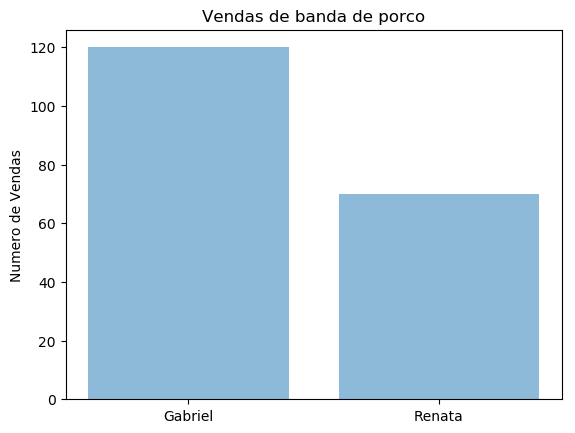

In [13]:
df = pd.DataFrame(result3)
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = tuple(df.nome)
y_pos = np.arange(len(objects))
performance = list(df.total_de_vendas)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Numero de Vendas')
plt.title('Vendas de banda de porco')
 
plt.show()

## Relatorio de frota(não tem nada a ver com o alexandre)

### Objetivo: Saber quantos automóveis refrigerados e não refrigerados a empresa possui

#### Código:

In [14]:
result4 = pd.read_sql_query("""select isrefrigerado as refrigerado,count(isrefrigerado)as numero_de_automoveis from automovel
group by isrefrigerado;""",conn)

#### imprimindo resultado:

In [15]:
result4

,refrigerado,numero_de_automoveis
0,False,2
1,True,3


## Relatorio de Compras

### Objetivo: Saber quantas bandas de porco cada cliente comprou

#### Código:

In [39]:
result5 = pd.read_sql_query("""select nomeficticio as nome_cliente,sum(numeroBandas)as numeroBandas from _pedido
inner join cliente
on(cliente.id = _pedido.fk_cliente_id)
group by nomeficticio
order by numerobandas desc;""",conn)

#### Imprimindo o resultado:

In [40]:
result5

,nome_cliente,numerobandas
0,Extra Bom,85
1,Eldorado,40
2,Carone,35
3,Perim,30


#### Gerando gráfico: 

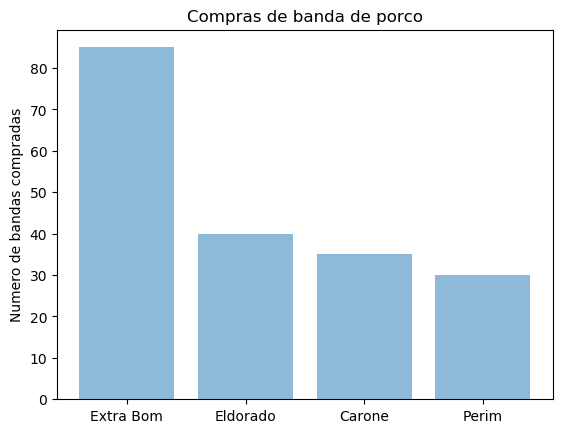

In [45]:
df = pd.DataFrame(result5)
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)

objects = tuple(df.nome_cliente)
y_pos = np.arange(len(objects))
performance = list(df.numerobandas)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Numero de bandas compradas')
plt.title('Compras de banda de porco')
plt.show()